In [591]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from numpy.linalg import eig

In [592]:
# 16 * 16 == 256 (D) 
# N = 200 for 3 and 8

In [593]:
# read 3.txt
three = pd.read_csv('three.txt', header=None, delim_whitespace=True)

In [594]:
# read 8.txt
eight = pd.read_csv('eight.txt', header=None, delim_whitespace=True)

In [595]:
three_np = three.to_numpy()

In [596]:
eight_np = eight.to_numpy()

# Q1: Display first 3 and 8

In [597]:
first_3 = np.reshape(three_np[0], (16, 16))
first_8 = np.reshape(eight_np[0], (16, 16))

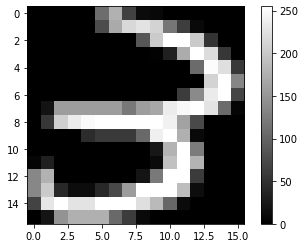

In [598]:
plt.imshow(first_3.T, cmap='gray', vmin=0, vmax=255)
plt.colorbar()
plt.show()

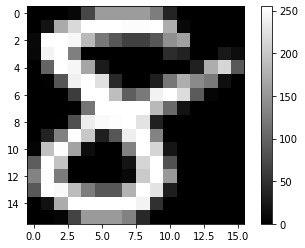

In [599]:
plt.imshow(first_8.T, cmap='gray', vmin=0, vmax=255)
plt.colorbar()
plt.show()

# Q2: Compute mean (y) and display 

In [600]:
numbers = np.append(three_np, eight_np, axis=0)

In [601]:
y = np.mean(numbers, axis=0)

In [602]:
y_image = np.reshape(y, (16, 16))

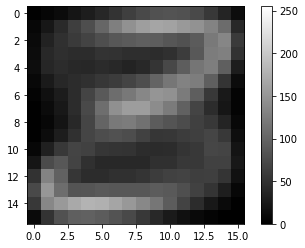

In [603]:
plt.imshow(y_image.T, cmap='gray', vmin=0, vmax=255)
plt.colorbar()
plt.show()

# Q3: Center X using y. Form sample covariance matrix S. Show the submatrix S[:5][:5]

In [604]:
X = numbers - y

In [605]:
S = np.dot(X.T, X) / (X.shape[0]-1)

In [606]:
S.shape

(256, 256)

In [607]:
S_submatrix_5x5 = S[0:5:1, 0:5:1]

In [608]:
S_submatrix_5x5

array([[  59.16729323,  142.14943609,   28.68201754,   -7.17857143,
         -14.3358396 ],
       [ 142.14943609,  878.93879073,  374.13731203,   24.12778195,
         -87.12781955],
       [  28.68201754,  374.13731203, 1082.9058584 ,  555.2268797 ,
          33.72431078],
       [  -7.17857143,   24.12778195,  555.2268797 , 1181.24408521,
         777.77192982],
       [ -14.3358396 ,  -87.12781955,   33.72431078,  777.77192982,
        1429.95989975]])

# Q4: Compute eigen values l1, l2 and eigen vectors v1, v2 of S. Show l1, l2. Visualize v1, v2 as 2 images. Add a colorbar

In [609]:
L, v = eig(S)

In [610]:
sorted_idx = np.argsort(L)[::-1]
L = L[sorted_idx]
v = v[:,sorted_idx]

In [611]:
L1 = L[0]
L2 = L[1]

In [612]:
V1 = v.T[0]
V2 = v.T[1]

In [613]:
L1

237155.2462904853

In [614]:
L2

145188.3526868256

In [615]:
V1_image = np.reshape(((V1 - V1.min()) * (1/(V1.max() - V1.min()) * 255)).astype('uint8'), (16, 16))

In [616]:
V2_image = np.reshape(((V2 - V2.min()) * (1/(V2.max() - V2.min()) * 255)).astype('uint8'), (16, 16))

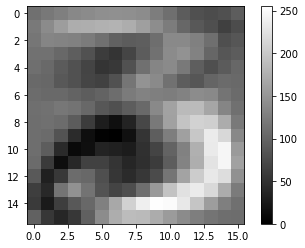

In [617]:
plt.imshow(V1_image.T, cmap='gray', vmin=0, vmax=255)
plt.colorbar()
plt.show()

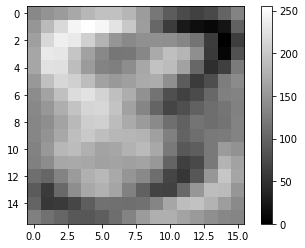

In [618]:
plt.imshow(V2_image.T, cmap='gray', vmin=0, vmax=255)
plt.colorbar()
plt.show()

# Q5: Project X down to V1 and V2, i.e. compute XV. Show the two co-ordinates for first line in three and eight

In [619]:
V = np.vstack([np.reshape(V1,(1, V1.size)), np.reshape(V2,(1, V2.size))]).T

In [620]:
XV = np.dot(X, V)

In [621]:
XV.shape

(400, 2)

In [622]:
# co-ordinates for 1st three
XV[0]

array([ 136.20872784, -242.62848028])

In [623]:
# co-ordinates for 1st eight
XV[200]

array([-312.68702792,  649.57346086])

In [624]:
# Calculation on scaled V_image

In [625]:
V_image = np.vstack([np.reshape(V1_image,(1, V1_image.size)), np.reshape(V2_image,(1, V2_image.size))]).T

In [626]:
XV_image = np.dot(X, V_image)

In [627]:
# co-ordinates for 1st three
XV_image[0]

array([228352.83 , -49638.115])

In [628]:
# co-ordinates for 1st eight
XV_image[200]

array([ 251859.83 , 1135966.885])

# Q6: Plot the 2D point cloud of the 400 digits after projection. Color 3s as red and 8s as blue

In [629]:
XV3 = XV[0:200:1]
XV8 = XV[200:400:1]

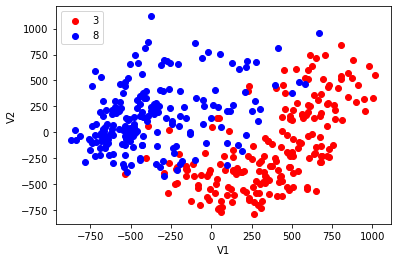

In [630]:
plt.scatter(XV3.T[0], XV3.T[1], c='r', label='3')
plt.scatter(XV8.T[0], XV8.T[1], c='b', label='8')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend(loc='upper left')
plt.show()

In [631]:
# Plotting using the scaled values of 

In [632]:
XV3_image = XV_image[0:200:1]
XV8_image = XV_image[200:400:1]

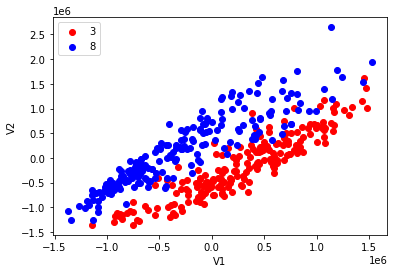

In [633]:
plt.scatter(XV3_image.T[0], XV3_image.T[1], c='r', label='3')
plt.scatter(XV8_image.T[0], XV8_image.T[1], c='b', label='8')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend(loc='upper left')
plt.show()